# Module 3 Assignment: Analyzing Movie Data with SQL

Welcome to this module's assignment!

Carefully read each Markdown (text) cell, which includes instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:

You've joined a media analytics company focused on streaming insights. Your task is to analyze the MUBI movie dataset to uncover trends between ratings, genres, and movie success — helping guide marketing, investment, and promotion strategies.

You will work with the following tables. Bolded variables are the ones you will use in this lab:

**movies**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| `movie_id`  | INTEGER   | ID related to the movie on Mubi      |
| **`movie_title`**| TEXT      | Name of the movie                   |
| **`movie_release_year`**| INTEGER   | Release year of the movie            |
| `movie_url`| TEXT  | URL to the movie page on Mubi |
| `movie_title_language`| TEXT | By default, the title is in English. |
| **`movie_popularity`**   | INTEGER      | Number of Mubi users who love this movie                 |
| `movie_image_url`| TEXT |    Image URL to the movie on Mubi | 
| `director_id`  | INTEGER   | ID related to the movie director on Mubi    |
| `director_name`    | TEXT      |	Full Name of the movie director    |
| `director_url` | TEXT | URL to the movie director page on Mubi| 
| **`rating`** | FLOAT | Movie rating, based on Mubi user ratings | 

**ratings**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| **`movie_id`** | INTEGER   | Movie ID related to the rating       |
| `rating_id`   | INTEGER   | Rating ID on Mubi       |
| `rating_url`   | TEXT   | URL to the rating on Mubi       |
| `rating_score`    | INTEGER      | Rating score ranging from 1 (lowest) to 5 (highest) |
| `rating_timestamp` | INTEGER   | Timestamp for the movie rating made by the user on Mubi              |
| **`critique`**| TEXT | critique made by the user rating the movie. If value = "None", the user did not write a critique when rating the movie. |
| **`critique_likes`** | INTEGER | Number of likes related to the critique made by the user rating the movie |
| `critique_comments` | INTEGER | Number of comments related to the critique made by the user rating the movie |
| `user_id` | INTEGER | ID related to the user rating the movie | 
| `user_trialist` | INTEGER | 1 = the user was a trialist when he rated the movie 0 = the user was not a trialist when he rated the movie |
| `user_subscriber` | INTEGER | 1 = the user was a subscriber when he rated the movie 0 = the user was not a subscriber when he rated the movie |
| `user_elegible_for_trial` | INTEGER | 1 = the user was eligible for trial when he rated the movie 0 = the user was not eligible for trial when he rated the movie |
| `user_has_payment_method` | INTEGER | 1 = the user was a paying subscriber when he rated the movie 0 = the user was not a paying subscriber when he rated |




## In order for your submission to be graded correctly, you **MUST**:
* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the blue submit button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of Contents

- [Step 1: Importing modules](#step-1)
- [Step 2: Loading the Dataset](#step-2)
    - [Exercise 1: Connect to the database](#ex1)
    - [Exercise 2: Verify data availability](#ex2)
- [Step 3: Exploring the database](#step-3)
    - [Exercise 3: Analyzing Recent Movie Trends](#ex3)
    - [Exercise 4: Identifying Top-Rated Movies](#ex4)
    - [Exercise 5: Exploring Popular Directors](#ex5)
    - [Exercise 6: Critiques with Most Likes](#ex6)

<a id="step-1"></a>

## Step 1: Importing modules

Before you start working on the dataset, it is good practice to import all modules at the beginning of your code. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to import the following <code>sqlite3</code> and <code>pandas</code> libraries.</li>
        </ol>
</div>

In [1]:
# 🔒This cell is locked. You will not be able to edit it.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<a id="step-2"></a>

## Step 2: Loading the Dataset
<a id="ex1"></a>

#### Exercise 1: Connect to the database

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
2. Connect to the SQLite `"mubi_movies_ratings.db"` database
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To connect to the database, you can use the `sqlite3.conect()` function, which receives the path to the database as an argument
</details>

In [2]:
# GRADED CELL: Exercise 1

# define the path to the database. DO NOT CHANGE THIS PATH
db_path = "mubi_movies_ratings.db"
### START CODE HERE ###

# create a connection to the database
connection = sqlite3.connect(db_path)

### END CODE HERE ###

<a id="ex2"></a>

#### Exercise 2: Verify data availability

Now verify that the movies table is accessible

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a query to retrieve the first row in the movies table using Pandas
</div>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- Here are some tips to write the query:
    - To get all the columns in a table, you can use `SELECT` followed by `*`
    - Remember to select the correct table using the `FROM` command
    - `LIMIT` will help you set how many rows you want to retrieve 
</details>


In [3]:
# GRADED CELL: Exercise 2 

### START CODE HERE ###

# write the query to get the first element from the movies table
query_first = """
SELECT *
FROM movies
LIMIT 1;
"""

### END CODE HERE ###

# run the query
first_row_df = pd.read_sql_query(query_first, connection)

In [4]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
first_row_df

,movie_id,movie_title,movie_release_year,movie_url,movie_title_language,movie_popularity,movie_image_url,director_id,director_name,director_url,rating
0,1,La Antena,2007.0,http://mubi.com/films/la-antena,en,105,https://images.mubicdn.net/images/film/1/cache...,131,Esteban Sapir,http://mubi.com/cast/esteban-sapir,3.8


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex2.png" width="1000"/>

</details>

<a id="step-3"></a>

## Step 3: Exploring the database

<a id="ex3"></a>

#### Exercise 3: Analyzing Most Popular Movies

To help your company understand recent trends in the film industry, you need to explore the relationship between movie release dates and their popularity. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQL query that 
    - Selects the `movie_title`, and `movie_release_year` from the movies table
    - Orders the results by `movie_popularity` in **descending** order to identify the most popular recent films.
2. Run the query using Pandas
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To write the query you need a string (text) with the query. You can use the following structure
    ```SQL
    SELECT <<column name, column name>>
    FROM <<table name>>
    ORDER BY <<column name>> <<ORDER>>;
    ```
- To run the query and get the results in a DataFrame, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) functions. The arguments for this function are the query, and the connection.
</details>


In [5]:
# GRADED CELL: Exercise 3

### START CODE HERE ###

# write the SQL query
query_best_rated = """
SELECT movie_title, movie_release_year
FROM movies
ORDER BY movie_popularity DESC;
"""

# run the query
best_rated_df = pd.read_sql_query(query_best_rated, connection)

### END CODE HERE ###

In [6]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
best_rated_df.head()

,movie_title,movie_release_year
0,Pulp Fiction,1994.0
1,2001: A Space Odyssey,1968.0
2,The Godfather,1972.0
3,A Clockwork Orange,1971.0
4,Taxi Driver,1976.0


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex3.png" width="250"/>
</details>

In addition to identifying standout titles, examining the number of releases per year offers insight into overall production patterns and industry momentum. Focus only on the last years

In [7]:
# 🔒This cell is locked. You will not be able to edit it.

df_new = best_rated_df[best_rated_df["movie_release_year"]>=2018]
year_counts = df_new['movie_release_year'].value_counts().sort_index()
print(year_counts)

movie_release_year
2018.0    11803
2019.0    10519
2020.0     3062
2021.0      168
Name: count, dtype: int64


The overwhelming majority of movies released since 2018 in the dataset are from 2018 and 2019, with very few entries from 2020 and 2021 — suggesting either incomplete data or a lag in updating the database.

<a id="ex4"></a>

#### Exercise 4: Identifying Top-Rated Movies

In order to improve marketing campaigns and promotional efforts, you are tasked with identifying critically acclaimed films. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Select the `movie_title`, `movie_release_year` and `rating` from the `movies` table 
    - Order by `movie_popularity` in **descending** order
2. Run the query using Pandas
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To write the query you need a string (text) with the query. Remember to end the query with a semicolon (";")
- You need to select the desired columns from the correct table
- You can use the `WHERE` statement to select the rows with `rating > 4.5`
- Remember to set the ordering to `DESC`
- To run the query and get the results in a DataFrame, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) functions. The arguments for this function are the query, and the connection.
</details>


In [8]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# write the SQL query
query_high_ratings = """
SELECT movie_title, movie_release_year, rating
FROM movies
ORDER BY movie_popularity DESC;
"""

# run the query
high_ratings_df = pd.read_sql_query(query_high_ratings, connection)

### END CODE HERE ###

# filter the DataFrame to only include movies with a rating above 4.5
high_ratings_df = high_ratings_df[high_ratings_df["rating"] > 4.5]

In [9]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
high_ratings_df.head()

,movie_title,movie_release_year,rating
2,The Godfather,1972.0,4.6
20,Seven Samurai,1954.0,4.6
258,The Decalogue,1989.0,4.6
261,Come and See,1985.0,4.6
321,Harakiri,1962.0,4.6


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex4.png" width="400"/>
</details>

You can use this data to visualize how many successful movies were released each year 

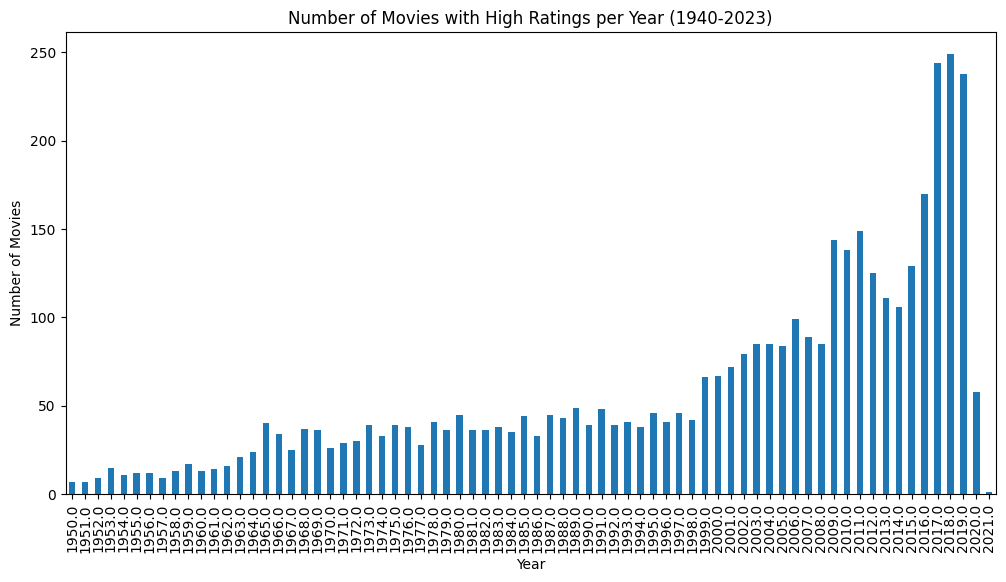

In [10]:
# 🔒This cell is locked. You will not be able to edit it.

high_ratings_per_year = high_ratings_df[high_ratings_df["movie_release_year"]>=1950].groupby(
                            'movie_release_year').size()
plt.figure(figsize=(12, 6))
high_ratings_per_year.plot(kind='bar')
plt.title("Number of Movies with High Ratings per Year (1940-2023)")
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

Can you explain the lower amount of movies in 2020 and 2021? Keep in mind that the database covers only until 2021.

<a id="ex-5"></a>

#### Exercise 5: Exploring Popular Directors
Another factor you can consider to report to the marketing team in the company is movie directors. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Select the `director_name`, `rating` and `movie_popularity` of the 10 most popular movies
    - Order the results by `popularity` in descending order.
2. Run the query using Pandas
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To write the query you need a string (text) with the query. Remember to end the query with a semicolon (";")
- You need to select the desired columns from the correct table
- Remember to set the ordering to `DESC`
- The `LIMIT` statement will help you select the desired amount of rows
- To run the query and get the results in a DataFrame, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) functions. The arguments for this function are the query, and the connection.
</details>


In [13]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# write the SQL query
query_directors = """
SELECT director_name, rating, movie_popularity
FROM movies
ORDER BY movie_popularity DESC
LIMIT 10;
"""

# run the query
directors_df = pd.read_sql_query(query_directors, connection)

### END CODE HERE ###

In [14]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
directors_df

,director_name,rating,movie_popularity
0,Quentin Tarantino,4.4,13989
1,Stanley Kubrick,4.5,13881
2,Francis Ford Coppola,4.6,13103
3,Stanley Kubrick,4.3,12400
4,Martin Scorsese,4.4,11591
5,Stanley Kubrick,4.3,11407
6,Francis Ford Coppola,4.4,9861
7,Michel Gondry,4.1,9818
8,Alfred Hitchcock,4.4,9685
9,Stanley Kubrick,4.4,9657


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex5.png" width="300"/>
</details>

You can use a bar chart to highlight which directors are consistently tied to popular movies.

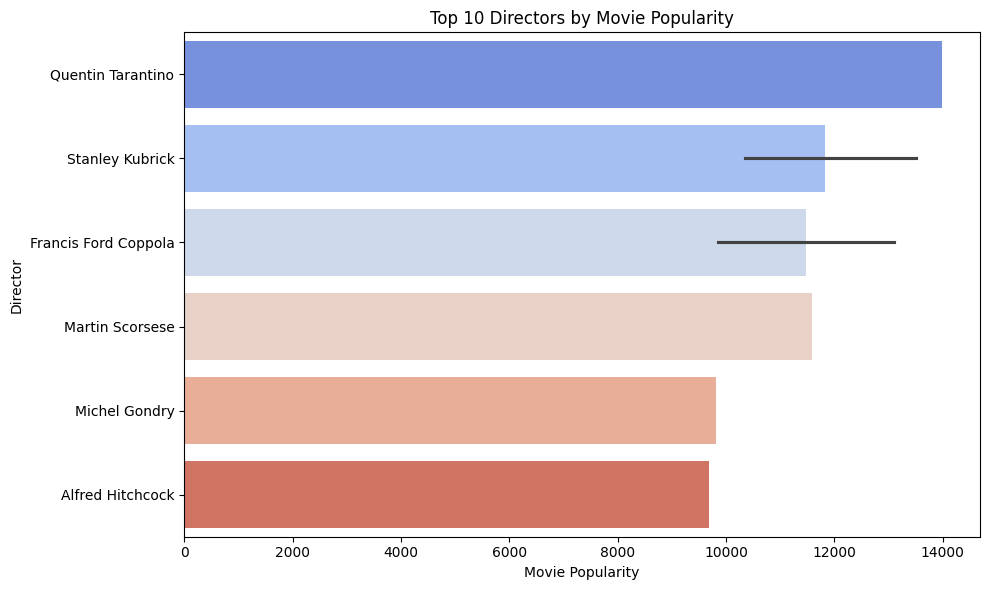

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=directors_df, y="director_name", x="movie_popularity", palette="coolwarm", hue="director_name")
plt.title("Top 10 Directors by Movie Popularity")
plt.xlabel("Movie Popularity")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

<a id="ex-6"></a>

#### Exercise 6: Critiques with Most Likes
To understand what drives viewer interaction and engagement, you want to analyze the reviews that generate a lot of likes. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQL query to: 
    - Select the `movie_id`, `critique` and `critique_likes` from the `ratings` table
    - Keep only the reviews with the 50 highest number of comments.
    - Order the results by `critique_likes` in **descending** order to identify the most commented movies.
2. Run the query using Pandas
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To write the query you need a string (text) with the query. Remember to end the query with a semicolon (";")
- You need to select the desired columns from the correct table
- Remember to set the ordering to `DESC`
- To run the query and get the results in a DataFrame, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) functions. The arguments for this function are the query, and the connection.
</details>


In [16]:
# GRADED CELL: Exercise 6

### START CODE HERE ###

# write the SQL query
query_likes = """
SELECT movie_id, critique, critique_likes
FROM ratings
ORDER BY critique_likes DESC
LIMIT 50;
"""

# run the query
likes_df = pd.read_sql_query(query_likes, connection)

### END CODE HERE ###

In [17]:
# 🔒This cell is locked. You will not be able to edit it.

# get number of rows
print(f"\nnumber of rows: {len(likes_df)}\n")

# print the top 5 results
likes_df.head()


number of rows: 50



,movie_id,critique,critique_likes
0,154692,Call me By Your Name. By my name. By our name....,79
1,111447,nearly dead whale wants to live; nearly alive ...,78
2,133823,This should have been called The Death of Tale...,74
3,133187,ARRIVAL HAS CHANGED MY LIFE,67
4,224497,I adore films that look like paintings. It's ...,66


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex6.png" width="400"/>
</details>

To get a feel for the language used in popular reviews, you can use a word cloud built from the most liked critique texts.

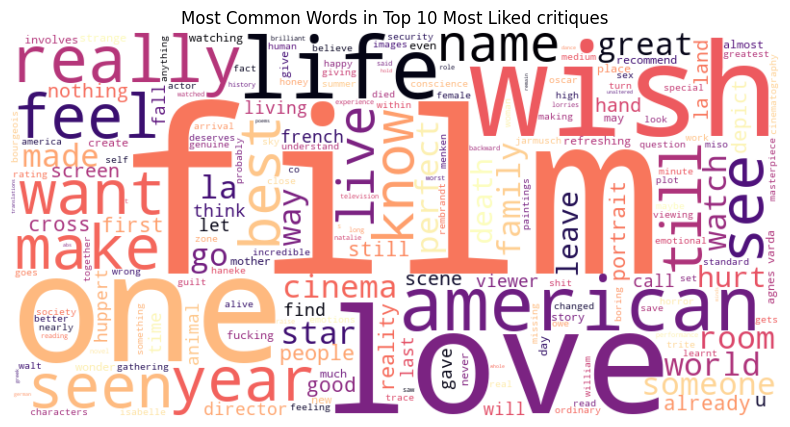

In [18]:
# 🔒This cell is locked. You will not be able to edit it.

# combine the top critiques' text
text = " ".join(likes_df['critique'].dropna().str.lower().tolist())

# generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text)

# create the chart
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Top 10 Most Liked critiques")
plt.show()

Finally, run the next cell to close the connection

In [19]:
# 🔒This cell is locked. You will not be able to edit it.

connection.close()

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.